# Deep Learning

## Objective
To develop a highly accurate and efficient image classification model capable of reliably distinguishing between images of cats and dogs, providing a reliable and user-friendly tool for image categorization.

## Data Definition
We have few images for Dogs and cats in PetImages directory which will be used to train the model and then we will use some test data to evaluate our model
### Size
We have about 1500 Dog image and 1500 Cat images
### Colors
The images are RGB color, so there will be 3 color channles
### Labels
**Classes:** Two classes: "cat" and "dog"
**Annotation:** Binary labels (0 for cat, 1 for dog) associated with each image

### Deep Learning Models to use
#### Convolutional Neural Networks (CNNs)
Specialized for image and video data.
#### Recurrent Neural Networks (RNNs): 
Designed for sequential data like text and time series.
#### Fully Connected Networks (FCNs): 
General-purpose neural networks that can be used for various tasks, including image classification.
#### Autoencoders: 
Unsupervised learning models used for dimensionality reduction and feature extraction.

### Why CNNs are Better for Image Classification:
#### Spatial Invariance: 
CNNs are inherently designed to handle spatial relationships in images. The convolutional layers allow the model to learn and recognize patterns regardless of their location within the image.
#### Feature Extraction: 
CNNs can automatically learn hierarchical features from images, starting with simple low-level features (e.g., edges and lines) and progressing to more complex high-level features (e.g., objects and scenes). This eliminates the need for manual feature engineering.
#### Weight Sharing: 
CNNs use weight sharing, which reduces the number of parameters and helps prevent overfitting.
#### Pooling Layers: 
Pooling layers in CNNs help reduce the dimensionality of the feature maps, making the model more computationally efficient and reducing the risk of overfitting.
#### Success in Real-World Applications: 
CNNs have achieved state-of-the-art performance on a wide range of image classification tasks, including object detection, image segmentation, and medical image analysis.

#### Import Required libraries

In [48]:
import os
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from shutil import copyfile
import numpy as np
from os import getcwd

#### Set working paths

In [13]:
CAT_SRC = f'{os.getcwd()}/PetImages/Cat/'
DOG_SRC = f'{os.getcwd()}/PetImages/Dog/'
TRAIN_DIR = f'{os.getcwd()}/PetImages/Train/'
TEST_DIR = f'{os.getcwd()}/PetImages/Test/'
CAT_TRAIN = f'{TRAIN_DIR}Cat/'
CAT_TEST = f'{TEST_DIR}Cat/'
DOG_TRAIN = f'{TRAIN_DIR}Dog/'
DOG_TEST = f'{TEST_DIR}Dog/'

#### See Available Images

In [14]:
print(len(os.listdir(CAT_SRC)))
print(len(os.listdir(DOG_SRC)))

1500
1500


#### Lets create some directories to spliting test and train images

In [15]:

try:
    os.mkdir(TRAIN_DIR)
    os.mkdir(TEST_DIR)
    os.mkdir(CAT_TRAIN)
    os.mkdir(CAT_TEST)
    os.mkdir(DOG_TRAIN)
    os.mkdir(DOG_TEST)
except OSError as e:
    print(e)

#### Split the images

In [16]:
def split_data(src, train, test, size):
    all_files = []
    
    for file_name in os.listdir(src):
        file_path = src + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * size)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(src + file_name, train + file_name)
        
    for file_name in test_set:
        copyfile(src + file_name, test + file_name)

split_size = .9
split_data(CAT_SRC, CAT_TRAIN, CAT_TEST, split_size)
split_data(DOG_SRC, DOG_TRAIN, DOG_TEST, split_size)

#### See split counts

In [17]:
print(len(os.listdir(CAT_TRAIN)))
print(len(os.listdir(CAT_TEST)))
print(len(os.listdir(DOG_TRAIN)))
print(len(os.listdir(DOG_TEST)))

1350
150
1350
150


#### Define Model to classify images

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=10,
    class_mode='binary',
    target_size=(150, 150)
)

validation_datagen = ImageDataGenerator(rescale=1 / 255)

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


#### Fit Data Generator

In [20]:
history = model.fit(train_generator,
                      epochs=2,
                      verbose=1,
                      validation_data=validation_generator)

Epoch 1/2


/home/freak/Freak/Trainings/Coursera-Assignments/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


270/270 ━━━━━━━━━━━━━━━━━━━━ 64s 235ms/step - acc: 0.4981 - loss: 0.7089 - val_acc: 0.5667 - val_loss: 0.6907
Epoch 2/2
270/270 ━━━━━━━━━━━━━━━━━━━━ 64s 235ms/step - acc: 0.5423 - loss: 0.6911 - val_acc: 0.5600 - val_loss: 0.6836


#### Plot loss and Accuracy of Model

Text(0.5, 1.0, 'Training and validation loss')

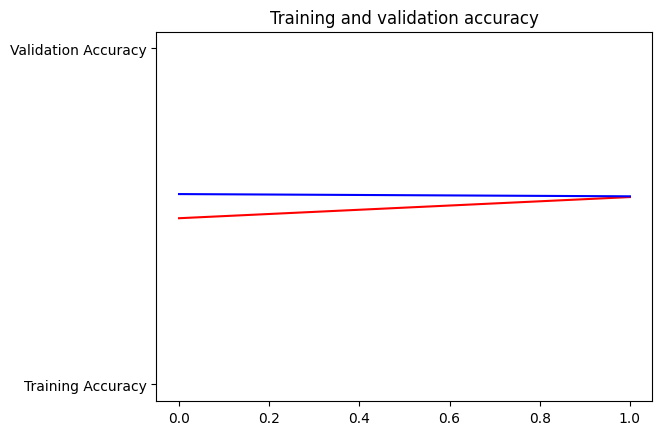

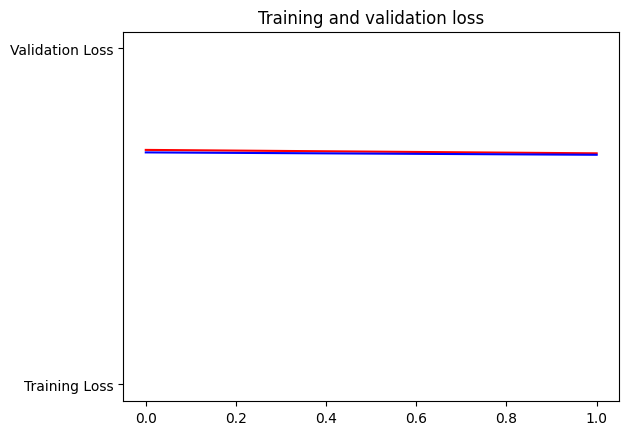

In [22]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

#### Lets try to predict using the model

In [53]:
image = random.choice(os.listdir(CAT_TEST))
image_path = f'{CAT_TEST}/{image}'
print(image)

cat.68.jpg


In [54]:
my_image = load_img(image_path, target_size=(150, 150))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)
[np.round(x) for x in prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[array([0.], dtype=float32)]

In [50]:
image = random.choice(os.listdir(DOG_TEST))
image_path = f'{DOG_TEST}/{image}'
print(image)

dog.407.jpg


In [52]:
my_image = load_img(image_path, target_size=(150, 150))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
model.predict(my_image)
[np.round(x) for x in prediction]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[array([1.], dtype=float32)]

##### So as we can see our Model is able to recognize Cats and Dogs

## Key observations
### Model Performance
The model is currently achieving an accuracy of 54.23% on the training set and 56.00% on the validation set. This indicates that the model is performing slightly better on the validation set compared to the training set, suggesting a potential for overfitting.

### Loss
The loss values for both the training and validation sets are relatively high (0.6911 and 0.6836, respectively). This suggests that the model is still struggling to learn the underlying patterns in the data.

### Convergence
After only 2 epochs, it's too early to determine whether the model has converged. More epochs are needed to assess the model's final performance and convergence behavior.

## Potential Next Steps
### Increase Epochs
Train the model for more epochs to allow it to learn more complex patterns and potentially improve accuracy.

### Adjust Hyperparameters
Experiment with different hyperparameters (e.g., learning rate, batch size, regularization) to see if they can improve the model's performance.
### Data Augmentation
Apply data augmentation techniques (e.g., rotation, flipping, cropping) to increase the diversity of the training data and reduce overfitting.
### Network Architecture
Consider modifying the network architecture (e.g., adding layers, changing filter sizes) to improve its ability to learn relevant features.
### Feature Engineering
Explore feature engineering techniques to extract more informative features from the images, potentially improving model performance.